### Extração de Características: Texturas

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

#### Histograma:

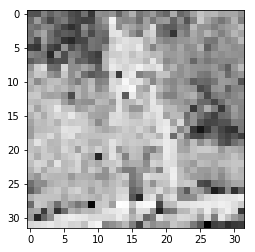

In [2]:
img = cv2.imread('gato1.png',0)
img = cv2.resize(img,(32,32))
plt.imshow(img,cmap= 'gray')

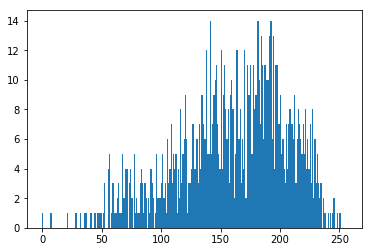

In [3]:
n,bins,_ = plt.hist(img.ravel(),256,[0,256])
plt.show()

#### Matriz de Diferença de Tons de Cinza

In [4]:
#O Critério Utilizado foi analizar o pixel acima e o pixel a direita
#Foi reduzida a dimensão de 256 para 8, em que cada valor é um lote de 32 pixels
def matDTC(timg,G):
    for i in range(timg.shape[0]):
        for j in range (timg.shape[1]):
            its = int(timg[i,j])
            if i-1 < 0 :
                continue
            elif j+1 >= timg.shape[1]:
                continue
        
            if timg[i-1,j] == timg[i,j+1]:
                G[its-1,int(timg[i,j+1])-1] +=1

    return G
            

In [5]:
timg = img.astype('float32')
timg = (timg+1)/32
timg = np.ceil(timg)

G = np.zeros((8,8))

In [6]:
G = matDTC(timg,G)
print(G)

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  2.  4.  0.  0.  1.  0.]
 [ 0.  1. 10.  8.  2.  0.  0.  1.]
 [ 0.  0.  4. 10. 16.  4.  1.  0.]
 [ 0.  0.  4.  4. 47. 17.  5.  0.]
 [ 0.  0.  0.  1. 14. 60. 24.  2.]
 [ 0.  0.  0.  3.  1. 22. 43.  4.]
 [ 0.  0.  0.  0.  2.  2.  6.  3.]]


#### Contraste:

In [7]:
def Contraste(G):
    sum = G.sum()
    print('Soma dos elem. de G:%d'% sum)
    C = 0
    for i in range (G.shape[0]):
        for j in range(G.shape[1]):
            p = G[i,j]/sum
            C += ((i-j)**2) * p
    return C
    

In [8]:
print('Contraste na imagem original:%f'% (Contraste(G)))
        

Soma dos elem. de G:328
Contraste na imagem original:0.993902


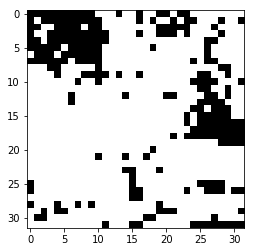

In [9]:
#Contraste na imagem binarizada-> grande variação de intensidade
_,thresh = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
plt.imshow(thresh,cmap = 'gray')
timg = thresh.astype('float32')
timg = (timg+1)/32
timg = np.ceil(timg)

G2 = np.zeros((8,8))


In [10]:
G2 = matDTC(timg,G2)
print('Contraste da imagem Binarizada:%f' %(Contraste(G2)))
### Como a variação das intensidades é maior o contraste também é maior.

Soma dos elem. de G:759
Contraste da imagem Binarizada:5.100132
